In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.express as px

In [3]:
df = pd.read_csv("churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.drop('customerID',axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [6]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [7]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-7-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [8]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


<Axes: >

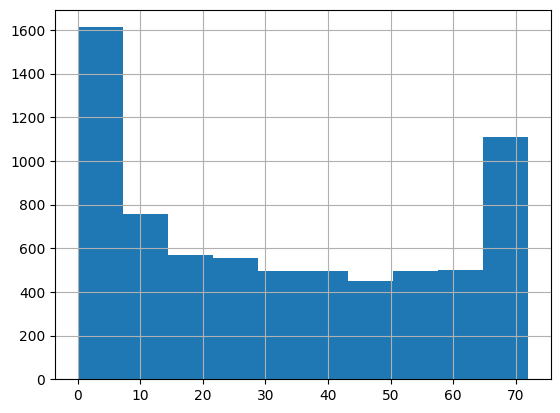

In [9]:
df.tenure.hist()

In [10]:
tenure_churn_no = df1[df1.Churn=='No'].tenure

In [11]:
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

In [12]:
tenure_churn_no

,tenure
0,1
1,34
3,45
6,22
7,10
...,...
7037,72
7038,24
7039,72
7040,11


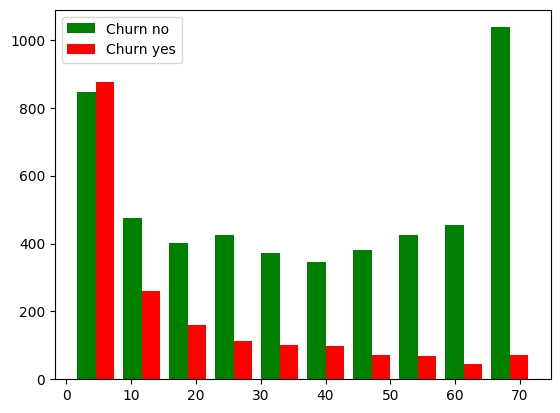

In [13]:
plt.hist([tenure_churn_no,tenure_churn_yes],color=['g','r'],label=['Churn no','Churn yes'])
plt.legend()
plt.show()

In [14]:
def get_unique_values(df):
    for col in df:
        print(f'{col}:{df[col].unique()}\n')

In [15]:
get_unique_values(df)

gender:['Female' 'Male']

SeniorCitizen:[0 1]

Partner:['Yes' 'No']

Dependents:['No' 'Yes']

tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService:['No' 'Yes']

MultipleLines:['No phone service' 'No' 'Yes']

InternetService:['DSL' 'Fiber optic' 'No']

OnlineSecurity:['No' 'Yes' 'No internet service']

OnlineBackup:['Yes' 'No' 'No internet service']

DeviceProtection:['No' 'Yes' 'No internet service']

TechSupport:['No' 'Yes' 'No internet service']

StreamingTV:['No' 'Yes' 'No internet service']

StreamingMovies:['No' 'Yes' 'No internet service']

Contract:['Month-to-month' 'One year' 'Two year']

PaperlessBilling:['Yes' 'No']

PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalChar

In [16]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-16-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-16-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [17]:
get_unique_values(df1.select_dtypes(object))

gender:['Female' 'Male']

Partner:['Yes' 'No']

Dependents:['No' 'Yes']

PhoneService:['No' 'Yes']

MultipleLines:['No' 'Yes']

InternetService:['DSL' 'Fiber optic' 'No']

OnlineSecurity:['No' 'Yes']

OnlineBackup:['Yes' 'No']

DeviceProtection:['No' 'Yes']

TechSupport:['No' 'Yes']

StreamingTV:['No' 'Yes']

StreamingMovies:['No' 'Yes']

Contract:['Month-to-month' 'One year' 'Two year']

PaperlessBilling:['Yes' 'No']

PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn:['No' 'Yes']



In [18]:
df1.replace({'Female': 1,'Male':0,'Yes':1,'No':0},inplace=True)

<ipython-input-18-045065146b11>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'Female': 1,'Male':0,'Yes':1,'No':0},inplace=True)
<ipython-input-18-045065146b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'Female': 1,'Male':0,'Yes':1,'No':0},inplace=True)


In [19]:
df1['InternetService'].replace(0,'No',inplace=True)

<ipython-input-19-d2bae8d53438>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['InternetService'].replace(0,'No',inplace=True)
<ipython-input-19-d2bae8d53438>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InternetService'].replace(0,'No',inplace=True)


In [20]:
df1[df1['InternetService']=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,0,0,0,0,16,1,0,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),18.95,326.80,0
16,1,0,0,0,52,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,20.65,1022.95,0
21,0,0,1,0,12,1,0,No,0,0,0,0,0,0,One year,0,Bank transfer (automatic),19.80,202.25,0
22,0,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,20.15,20.15,1
33,0,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,0,Bank transfer (automatic),20.20,20.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,1,0,0,0,51,1,0,No,0,0,0,0,0,0,Two year,0,Bank transfer (automatic),20.65,1020.75,0
7019,1,0,0,0,39,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.15,826.00,0
7020,0,0,1,1,12,1,0,No,0,0,0,0,0,0,Month-to-month,1,Electronic check,19.20,239.00,0
7030,1,0,0,0,2,1,0,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,20.05,39.25,0


In [21]:
get_unique_values(df1.select_dtypes(object))

InternetService:['DSL' 'Fiber optic' 'No']

Contract:['Month-to-month' 'One year' 'Two year']

PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']



In [22]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod']).astype(int)
df2.shape

(7032, 27)

In [23]:
df2
df2[['MonthlyCharges','TotalCharges','tenure']]

,MonthlyCharges,TotalCharges,tenure
0,29,29,1
1,56,1889,34
2,53,108,2
3,42,1840,45
4,70,151,2
...,...,...,...
7038,84,1990,24
7039,103,7362,72
7040,29,346,11
7041,74,306,4


In [24]:
from sklearn.preprocessing import MinMaxScaler
mmslr = MinMaxScaler()
df2[['MonthlyCharges','TotalCharges','tenure']] = mmslr.fit_transform(df2[['MonthlyCharges','TotalCharges','tenure']])

In [25]:
X = df2.drop('Churn',axis=1)
y = df2['Churn']


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=67)

In [28]:
X_train.shape,X_test.shape

((5625, 26), (1407, 26))

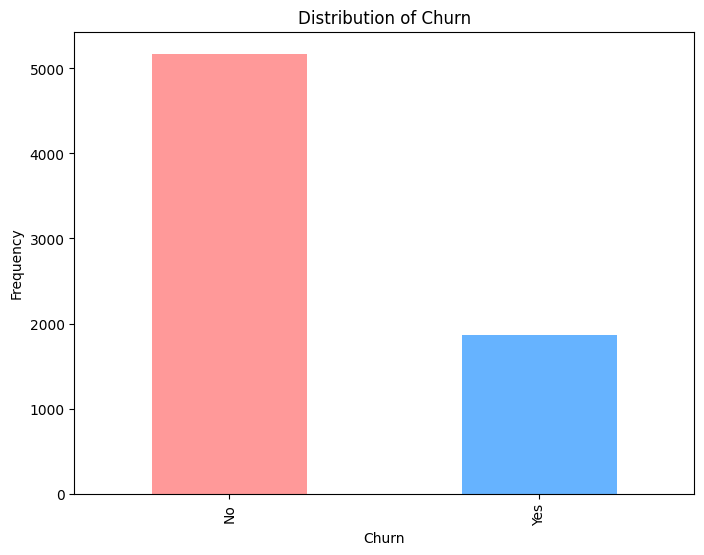

In [29]:
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='bar', color=['#ff9999', '#66b3ff'])
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.title('Distribution of Churn')
plt.show()

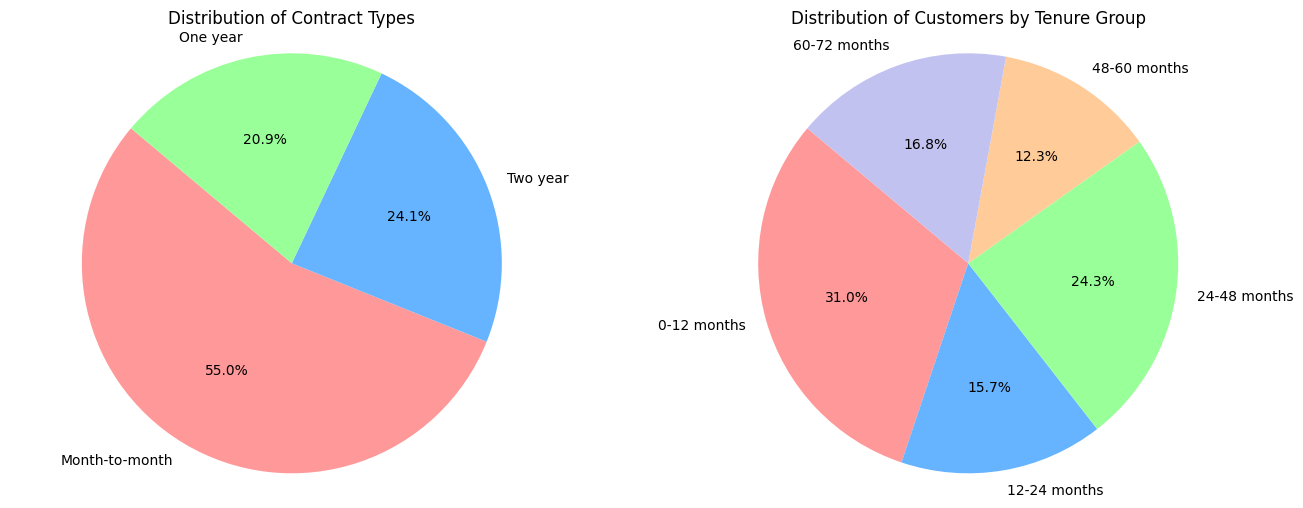

In [30]:

contract_counts = df['Contract'].value_counts()

bins = [0, 12, 24, 48, 60, 72]
labels = ['0-12 months', '12-24 months', '24-48 months', '48-60 months', '60-72 months']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
tenure_group_counts = df['tenure_group'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff', '#99ff99'])
ax1.set_title('Distribution of Contract Types')
ax1.axis('equal')

ax2.pie(tenure_group_counts, labels=tenure_group_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
ax2.set_title('Distribution of Customers by Tenure Group')
ax2.axis('equal')

plt.show()



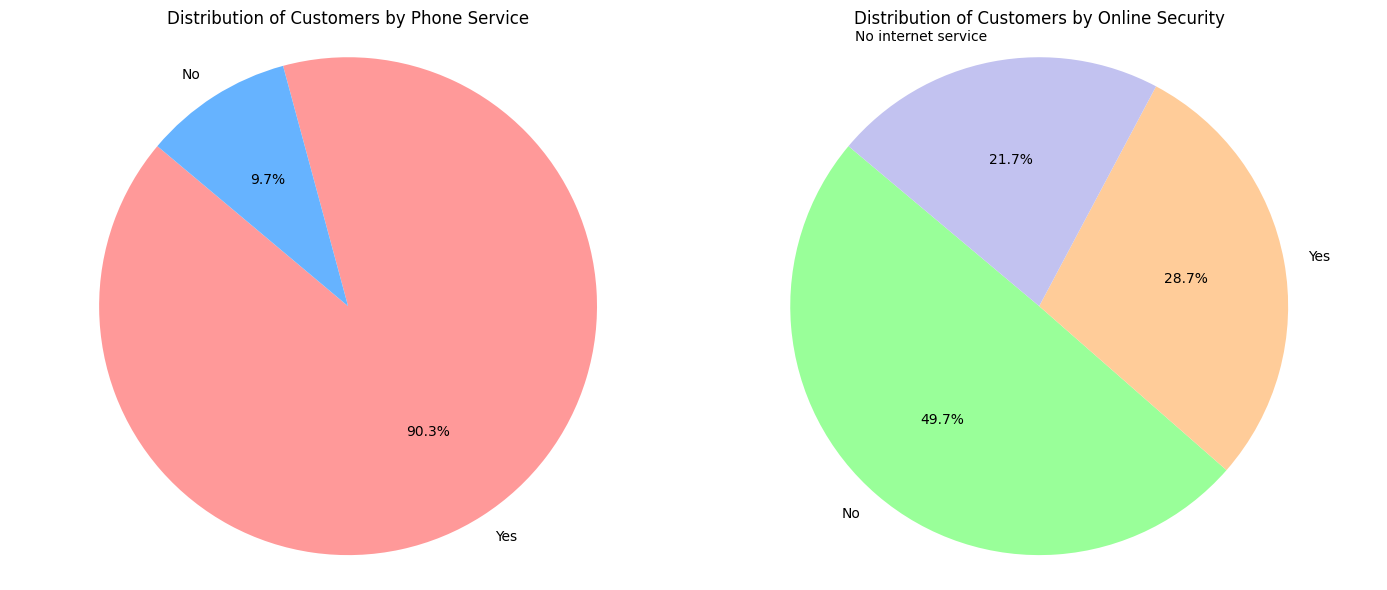

In [31]:
phone_service_counts = df['PhoneService'].value_counts()
online_security_counts = df['OnlineSecurity'].value_counts()
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(phone_service_counts, labels=phone_service_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Customers by Phone Service')
plt.axis('equal')
plt.subplot(1, 2, 2)
plt.pie(online_security_counts, labels=online_security_counts.index, autopct='%1.1f%%', startangle=140, colors=['#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Distribution of Customers by Online Security')
plt.axis('equal')

plt.tight_layout()
plt.show()

In [32]:
import plotly.express as px
def num_vs_target(df, col):
    fig = px.histogram(df, x=col, color='Churn', marginal='box')
    fig.show()

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    num_vs_target(df, col)



In [33]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
importances

array([0.03156685, 0.02339738, 0.0250203 , 0.02182404, 0.16416147,
       0.00702042, 0.02092296, 0.02192225, 0.02189393, 0.01958005,
       0.0212965 , 0.0169838 , 0.01844083, 0.02836436, 0.13737487,
       0.18495301, 0.01122843, 0.03412357, 0.01583489, 0.07104227,
       0.01136329, 0.02325247, 0.0126054 , 0.01332629, 0.03029339,
       0.01220698])

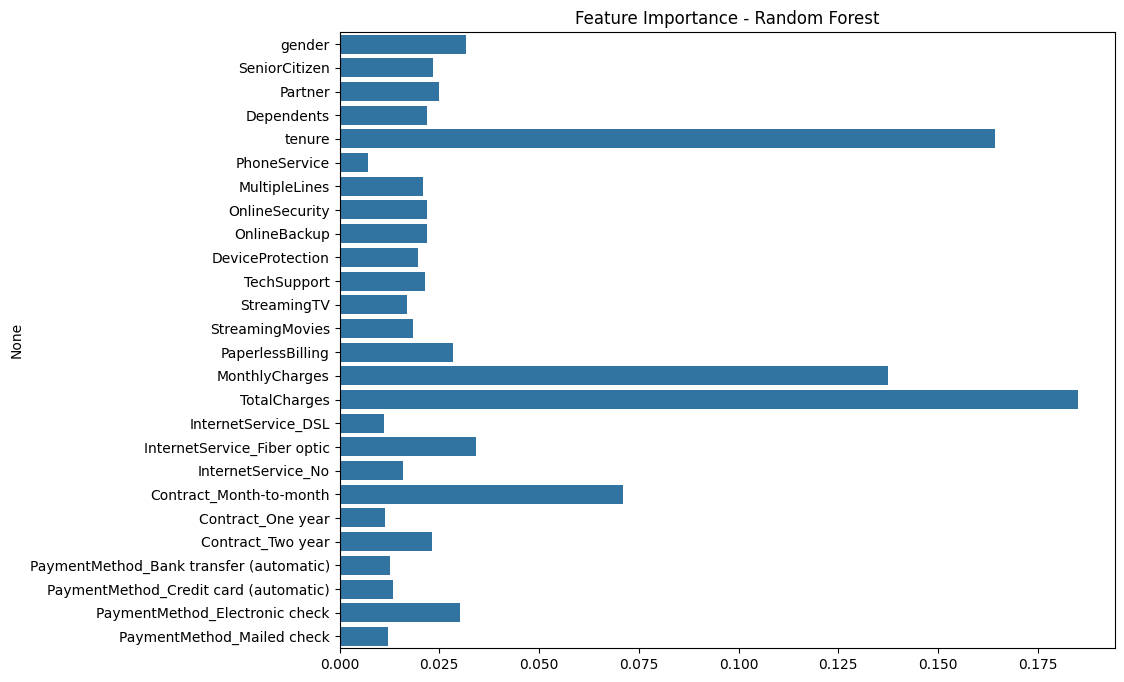

In [35]:
plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=feature_names, orient='h')
plt.title('Feature Importance - Random Forest')
plt.show()